##### Timothy's plotting question



Timothy wanted to know how to plot two graphs with different y-scales
over one another so that the y-scales are aligned.

Create datasets:



In [1]:
df1 = data.frame(x=1:10,y1=seq(from=0,to=100,length.out=10))
df2 = data.frame(x=1:10,y2=seq(from=-10,to=200,length.out=10))

df1
df2

#+begin_example
    x        y1
1   1   0.00000
2   2  11.11111
3   3  22.22222
4   4  33.33333
5   5  44.44444
6   6  55.55556
7   7  66.66667
8   8  77.77778
9   9  88.88889
10 10 100.00000
    x        y2
1   1 -10.00000
2   2  13.33333
3   3  36.66667
4   4  60.00000
5   5  83.33333
6   6 106.66667
7   7 130.00000
8   8 153.33333
9   9 176.66667
10 10 200.00000
#+end_example

Plot the datasets next to one another



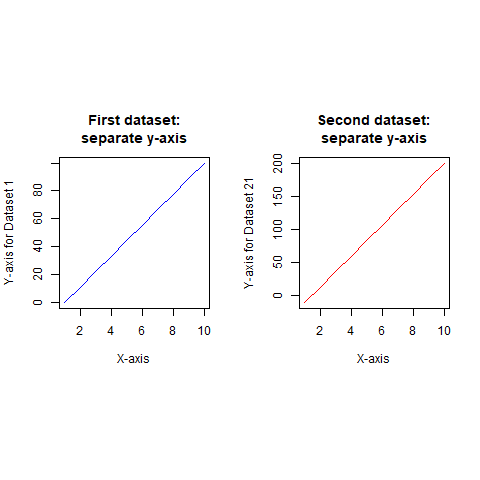

In [1]:
## 1 x 2 frame, use [s]quare plotting region
par(mfrow=c(1,2), pty='s') # 1 x 2 frame, use [s]quare plotting region

## plot first dataset - separate y-axis
plot(df1$x, df1$y1, type = "l", col = "blue",
     xlab = "X-axis", ylab = "Y-axis for Dataset 1",
     main='First dataset:\nseparate y-axis')

## plot second dataset - separate y-axis
plot(df2$x, df2$y2, type = "l", col = "red",
     xlab = "X-axis", ylab = "Y-axis for Dataset 21",
     main='Second dataset:\nseparate y-axis')

Let's plot them next to one another but with aligned y-scales. To do
that, we add the parameter `ylim` and set it to the larger of the two
intervals:



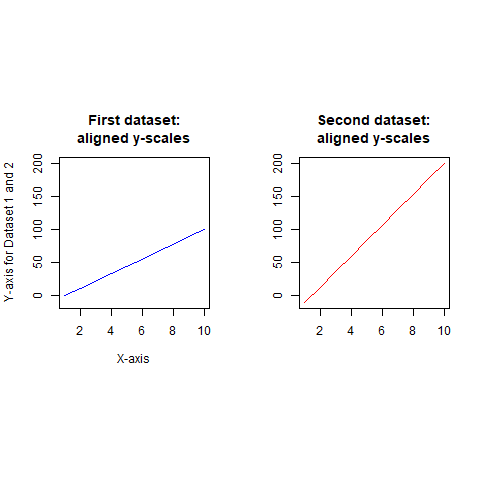

In [1]:
## 1 x 2 frame, use [s]quare plotting region
par(mfrow=c(1,2), pty='s') 

## plot first dataset - aligned y-axis
plot(df1$x, df1$y1, type = "l", col = "blue", ylim = c(-10,200),
     xlab = "X-axis", ylab = "Y-axis for Dataset 1 and 2",
     main='First dataset:\naligned y-scales')

## Plot the second dataset with its own y-axis
plot(df2$x, df2$y2, type = "l", col = "red", ylim = c(-10, 200),
     xlab="",ylab="",main='Second dataset:\naligned y-scales')

Now we remove all x-y-axis information from the second graph and plot
it on top of the first - `par(new=True)` enables that:



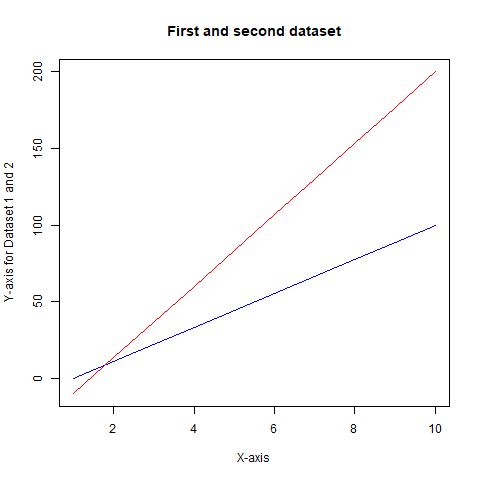

In [1]:
## 1 x 1 frame
par(mfrow=c(1,1))

## plot first dataset with y-axis and labels
plot(df1$x, df1$y1, type = "l", col = "blue", ylim = c(-10,200),
     xlab = "X-axis", ylab = "Y-axis for Dataset 1 and 2",
     main='First and second dataset')

## allow for the next plot to be plotted on top of the first
par(new=TRUE)

## Plot the second dataset without labels on top of the first
plot(df2$x, df2$y2, type = "l", col = "red", ylim = c(-10, 200),
     xaxt = "n", yaxt = "n", xlab = "", ylab = "", ann = FALSE,
     main="")